# "Evaluación de la música que más gusta"

In [1]:
#Se comienza importando las librerías a utilizar
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

Se restablecen los gráficos a un formato oscuro

In [2]:
mpl.style.use('dark_background')

y se descarga el la base de datos a evaluar

### 1. ¿Cuál es la variable de interés a pronosticar?, ¿Qué se espera lograr con este proyecto?



In [3]:
df=pd.read_csv('data.csv')
df.head(3)

,Song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,1,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0.187536
1,2,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,0.932479
2,3,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0.124371


##### Conclusiones

La variable de interés a pronosticar es 'liked', la cual describe el porcentaje de aceptación que una canción tiene en el público en función de distintos factores como lo son: bailabilidad, energía, intensidad y letra, entre otras.

Con este proyecto se espera diseñar un modelo de regresión simple en el que se pueda ingresar los datos de una nueva canción y pronosticar si al público le gustará o no.

### 2. ¿Cuántas variables hay y de qué tipos son?, ¿Por qué es importante conocer esta información?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              195 non-null    int64  
 1   danceability      195 non-null    float64
 2   energy            195 non-null    float64
 3   key               195 non-null    int64  
 4   loudness          195 non-null    float64
 5   mode              195 non-null    int64  
 6   speechiness       195 non-null    float64
 7   acousticness      195 non-null    float64
 8   instrumentalness  195 non-null    float64
 9   liveness          195 non-null    float64
 10  valence           195 non-null    float64
 11  tempo             195 non-null    float64
 12  duration_ms       195 non-null    int64  
 13  time_signature    195 non-null    int64  
 14  liked             195 non-null    float64
dtypes: float64(10), int64(5)
memory usage: 23.0 KB


##### Conclusiones

Lo primero a analizar son las dimensiones de la muestra: se cuenta con una cantidad de 15 variables y 195 observaciones. La mayoría de las variables son de tipo float, aunque también se observa que dentro de las 15, 5 son de tipo int.

Es importante preguntarnos esto porque nos interesa que nuestro modelo de regresión admita variables de tipo float, de lo contrario, las variables int o str tenderían a generar una gráfica muy distinta a la esperada.

### 3 ¿Qué distribución sigue la variable de interés ('liked')?

In [5]:
df.describe()

,Song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.000000,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.523054
std,56.435804,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.304057
min,1.000000,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.002014
25%,49.500000,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.235654
50%,98.000000,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,0.554601
75%,146.500000,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,0.775708
max,195.000000,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,0.999985


##### Conclusiones

Nuestra variable de interés se encuentra en un rango entre (0,1), lo cual representa el porcentaje de aceptación de la canción (de 0% a 100%). Es en ese rango en el que se encontrará nuestro pronóstico de regresión.

## 4. ¿Qué tipo de distribución sigue la variable de interés ('liked')?

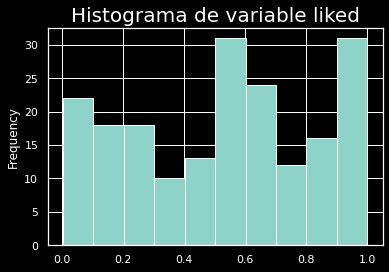

In [6]:
df['liked'].plot(kind = 'hist')
plt.title('Histograma de variable liked', fontsize = 20)
plt.show()

##### Conclusiones

Se observa que tiende a una distribución plana, pues no tiene forma de campana, pero tampoco presenta asimetría (cola hacia la izquierda o hacia la derecha).

## 5. ¿Cuál es la variable de mayor correlación con la variable de interés (liked)?
Se analizarán todas las variables para conocer aquella de mayor interés para el modelo.

In [7]:
vars = ['liked','acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
        'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
df = df[vars].dropna()
df[vars].corr()

,liked,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
liked,1.000000,-0.258060,0.364807,-0.413006,0.320734,-0.351964,-0.083018,-0.014927,0.455703,0.042203,0.892246,0.340290,0.127001,0.159298
acousticness,-0.258060,1.000000,-0.234176,0.138793,-0.772583,0.294320,-0.066844,-0.140988,-0.664989,-0.025709,-0.079710,-0.255097,-0.142177,-0.313806
danceability,0.364807,-0.234176,1.000000,-0.232621,0.137188,-0.807053,-0.063906,-0.137069,0.455078,0.043759,0.388596,0.223522,0.317096,0.612344
duration_ms,-0.413006,0.138793,-0.232621,1.000000,-0.134527,0.249683,0.054522,-0.143966,-0.206334,-0.060965,-0.388397,-0.256250,-0.039078,-0.114842
energy,0.320734,-0.772583,0.137188,-0.134527,1.000000,-0.241444,0.130251,0.166508,0.813567,-0.068308,0.122825,0.214905,0.123942,0.319409
instrumentalness,-0.351964,0.294320,-0.807053,0.249683,-0.241444,1.000000,0.003597,0.055730,-0.538266,0.075442,-0.343242,-0.299493,-0.375199,-0.572224
key,-0.083018,-0.066844,-0.063906,0.054522,0.130251,0.003597,1.000000,-0.039622,0.046865,-0.103371,-0.093395,0.097240,0.048344,0.033336
liveness,-0.014927,-0.140988,-0.137069,-0.143966,0.166508,0.055730,-0.039622,1.000000,0.078093,-0.048661,-0.006665,-0.010555,-0.135409,-0.013004
loudness,0.455703,-0.664989,0.455078,-0.206334,0.813567,-0.538266,0.046865,0.078093,1.000000,-0.041678,0.279710,0.274462,0.207806,0.363532
mode,0.042203,-0.025709,0.043759,-0.060965,-0.068308,0.075442,-0.103371,-0.048661,-0.041678,1.000000,0.031953,-0.036270,-0.110739,0.033409


##### Conclusiones

Innegablemente existe una variable que resalta sobre las demás, esta es "speechiness", la cual será la mejor opción para construir una función de regresión de la siguiente manera:

liked = B0 + B1 * speechiness

## 6. ¿Cómo es la correlación existente entre la variable independiente 'speechiness' y la variable dependiente 'liked'?

Para evaluarlo se codificará el ranking de aceptación de la variable "liked" en 4 categorías en función su clase: 1a, 2a, 3a o clase regular.

In [8]:
def category(rank):
    if (rank>=0)&(rank<=0.25):
        return 'regular class'
    elif (rank>0.25)&(rank<=0.5):
        return 'third class'
    elif (rank>0.5)&(rank<=0.75):
        return 'second class'
    else:
        return 'first class'

In [9]:
df['Rank'] = df['liked'].apply(lambda x:category(x))

Entonces ahora sí se realiza la Scatter Plot para "Speechiness" vs "Liked" categorizando en la nueva variable "Rank"

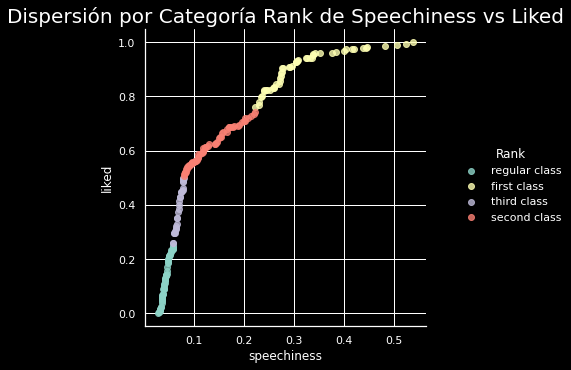

In [10]:
sns.lmplot(x = 'speechiness', y = 'liked', data = df, fit_reg = False, hue = 'Rank')
plt.title('Dispersión por Categoría Rank de Speechiness vs Liked', fontsize = 20)
plt.show()

##### Conclusiones

Se observa que la correlación es positiva, es decir, a medida que aumenta el criterio 'speechiness', aumenta el porcentaje de aceptación de la canción, ¿esto qué signifca? Que entre más letra tiene una canción es más probable que al público le guste.


## 7. ¿Existen valores atípicos en la variable independiente 'speechiness'?

Es importante saberlo para mantener la confiabilidad del pronóstico.

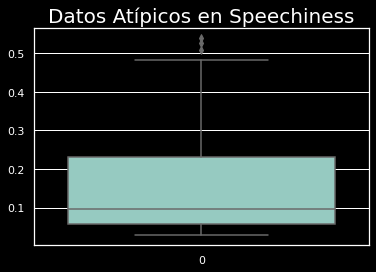

In [11]:
sns.boxplot(data = df.loc[:, 'speechiness'])
plt.title('Datos Atípicos en Speechiness', fontsize = 20)
plt.show()

##### Conclusiones

Se observa la presencia de 3 datos atípicos, sin embargo, el índice de correlación sigue siendo muy bueno, por lo que se procede a realizar el análisis de regresión.

## 8. ¿Qué tan bueno es el análisis de regresión para 'liked' en función de 'speechiness'?, ¿Qué indica la R-cuadrada?, ¿y los P-value de los parámetros B0 y B1?, ¿el Durbir-Watson?


In [12]:
model = sm.OLS.from_formula('liked~speechiness', data=df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  liked   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     753.6
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.46e-68
Time:                        21:07:22   Log-Likelihood:                 111.00
No. Observations:                 195   AIC:                            -218.0
Df Residuals:                     193   BIC:                            -211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1875      0.016     11.936      0.000       0.156       0.218
speechiness     2.2530      0.082     27.451      0.000       2.091       2.415
==============================================================================
Omnibus:                       20.211   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.777
Skew:                          -0.718   Prob(JB):                     5.07e-05
Kurtosis:                       2.392   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Conclusiones

Se observa en el modelo que los parámetros B0 y B1 son significativos, debido a que se encuentran por debajo del (alfa = 0.05), lo cual implica que se está manejando un buen modelo. En un análisis más detallado, el Durbin-Watson tiene un valor muy cercano a 2, lo cual también refiere a un modelo bueno para la independencia de los residuos; asimismo, el valor de R cuadrada es bajo, proponiendo que el modelo es de un muy buen ajuste.


## 9. ¿Cómo se vería nuevamente la gráfica de dispersión de las observaciones cs la gráfica de regresión propuesta por el modelo?, ¿Qué se puede concluir a partir de ello?

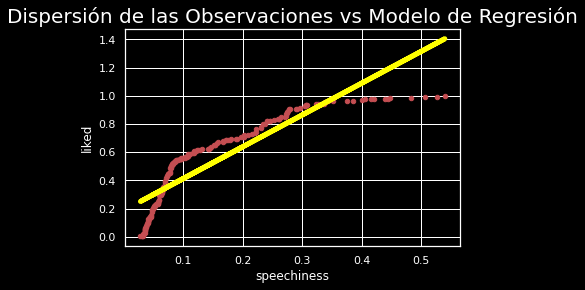

In [13]:
lm = linear_model.LinearRegression()
X = pd.DataFrame(df['speechiness'])
Y = pd.DataFrame(df['liked'])

model_lm = lm.fit(X,Y)
model_lm

df.plot(kind='scatter',
       x = 'speechiness',
       y = 'liked',
       color = 'r')

plt.plot(X,
        model_lm.predict(X),
        linewidth = 5,
        color = 'yellow')
plt.title('Dispersión de las Observaciones vs Modelo de Regresión', fontsize = 20)
plt.show()

## Conclusiones

#### Finalmente se grafica de nuevo la Scatter Plot con el pronóstico de regresión y se observa que se ajusta ciertamente bien para conocer el nivel de aceptación de una canción en función de la letra de la misma, lo cual era la meta del proyecto. 

#### Con este nuevo Modelo de Pronóstico, se pueden ingresar las métricas de cualquier canción y estimar si el sencillo será un hit o un flop en la industria.

Alonso Guerrero A00826840